In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# gender: 1= Male , 2 = Female.
# Pregnancy: 1= pregnant , 2 = Not pregnant
# 1: yes , 2: no
# physical activity = coded as 1 for inactive, 2 for minimally active, 3 for moderately active, and 4 for highly active.
# prediabetic: 0 : no 1: yes

In [ ]:
data = pd.read_csv('/content/merged_data_Prediabetic.csv')
data.drop(['wave','year','medication','medication_id'],axis = 1, inplace = True)

In [ ]:
data.dropna(how = 'any', axis = 0, subset = 'glucose', inplace = True)

In [ ]:
data.columns

Index(['seqn', 'gender', 'age', 'race_ethnicity', 'education_level',
       'family_income_ratio', 'pregnancy_status', 'annual_income', 'bmi',
       'weight', 'height', 'systolic_bp', 'diastolic_bp', 'glucose',
       'diabetes_pedigree_func', 'diabetes_outcome', 'ever_pregnant',
       'diabetes_during_pregnancy', 'triglycerides', 'hdl_cholesterol',
       'waist_circumference', 'smoker', 'diet_intake', 'alcohol_consumption',
       'physical_activity_level', 'sleep_duration_hours',
       'doctor_trouble_sleeping', 'doctor_sleep_disorder', 'days_used',
       'cholesterol', 'coffee_tea_added_sugar', 'A1C_level', 'pre_diabetic'],
      dtype='object')

In [ ]:
col = ['days_used','doctor_sleep_disorder','doctor_trouble_sleeping','sleep_duration_hours','alcohol_consumption',
       'diet_intake','smoker','diabetes_during_pregnancy','ever_pregnant','diabetes_pedigree_func','pregnancy_status',
       'family_income_ratio','education_level']

In [ ]:
data.drop(col, axis = 1,inplace = True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#diabetes = 2
#prediabetic = 1
# normal = 0

In [ ]:
condition = []

In [ ]:
for i in range(len(data)):
  if data.iloc[i]['diabetes_outcome'] == 1:
    condition.append(2)
  else:
    if data.iloc[i]['pre_diabetic'] == 0:
      condition.append(0)
    elif data.iloc[i]['A1C_level']> 6.5 and data.iloc[i]['pre_diabetic'] == 1:
      condition.append(2)
    else:
      condition.append(1)

In [ ]:
diabetes = data.drop(['diabetes_outcome','pre_diabetic'],axis = 1)

In [ ]:
diabetes['condition'] = condition

In [ ]:
diabetes

,seqn,gender,age,race_ethnicity,annual_income,bmi,weight,height,systolic_bp,diastolic_bp,glucose,triglycerides,hdl_cholesterol,waist_circumference,physical_activity_level,cholesterol,coffee_tea_added_sugar,A1C_level,condition
0,62161,1,22,3,14.0,23.3,69.2,172.3,110.0,82.0,92.0,110.0,41.0,68.0,2.0,168.0,2,5.1,0
2,62164,2,44,3,8.0,23.2,67.2,170.1,116.0,56.0,82.0,151.0,28.0,66.0,1.0,190.0,2,4.9,0
4,62169,1,21,5,2.0,20.1,54.6,164.8,124.0,80.0,107.0,73.0,43.0,64.0,2.0,132.0,2,5.4,1
7,62172,2,43,4,5.0,33.3,98.6,172.0,100.0,70.0,104.0,68.0,73.0,67.0,2.0,169.0,2,5.6,1
13,62177,1,51,5,77.0,20.1,57.3,168.9,152.0,68.0,95.0,130.0,43.0,67.0,2.0,198.0,2,5.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,71898,2,65,1,9.0,29.4,70.3,154.7,152.0,76.0,114.0,80.0,49.0,60.0,2.0,162.0,2,5.7,1
10690,71901,2,48,5,3.0,59.7,140.4,153.4,124.0,76.0,152.0,109.0,57.0,62.0,2.0,187.0,2,6.5,2
10699,71909,1,28,1,2.0,29.4,92.3,177.3,124.0,62.0,99.0,87.0,47.0,71.0,2.0,151.0,2,5.3,0
10700,71911,1,27,1,14.0,31.3,96.7,175.8,122.0,76.0,100.0,155.0,41.0,70.0,1.0,221.0,2,4.7,1


In [ ]:
 # 3 = non hispanic white , 4 = non hispanic black , 1 = mexican american, 2 = other hispanic, 5 = other race
# 1= male 2 = female

In [ ]:
diabetes.gender.unique()

array([1, 2])

In [ ]:
import seaborn as sns

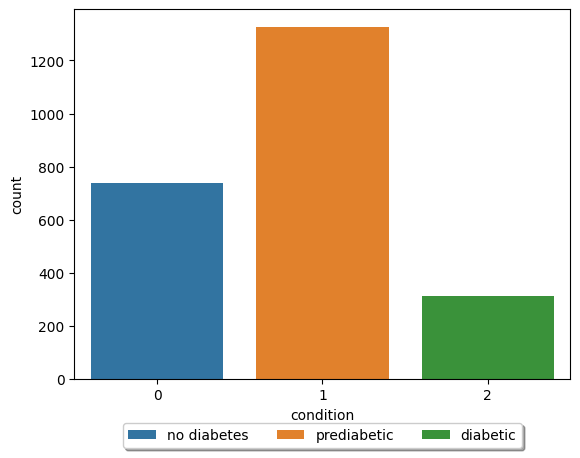

In [ ]:
from matplotlib import legend
fig = sns.countplot(data = diabetes, x = 'condition',hue= 'condition',dodge=False)
fig.legend(labels = ['no diabetes','prediabetic','diabetic'],loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol = 5)


In [ ]:
diabetes.to_csv('diabetes.csv')

In [ ]:
from sqlalchemy import create_engine

In [ ]:
person_data = diabetes[diabetes.columns[0:8]]
Glucose = diabetes[['seqn','glucose','A1C_level','condition']]
physical = diabetes[['seqn','waist_circumference','physical_activity_level','coffee_tea_added_sugar']]
blood_pressure = diabetes[['seqn','systolic_bp','diastolic_bp','triglycerides','hdl_cholesterol','cholesterol']]

In [ ]:
engine = create_engine('sqlite:///diabetes')

In [ ]:
person_data.to_sql('IndividualData', engine, if_exists='replace', index=False)
Glucose.to_sql('glucoseData', engine, if_exists='replace', index=False)
physical.to_sql('physicalData', engine, if_exists='replace', index=False)
blood_pressure.to_sql('generalData', engine, if_exists='replace', index=False)

5721

In [ ]:
pd.read_sql_query('SELECT seqn,gender,age,bmi,weight FROM IndividualData', engine)

AttributeError: ignored

In [ ]:
import pandas as pd

In [ ]:
merged_data = pd.merge(pd.read_sql_query('SELECT seqn,gender,age,bmi,weight FROM IndividualData', engine), pd.read_sql_query('SELECT seqn,glucose, A1C_level,condition FROM glucoseData', engine), on='seqn')
merged_data = pd.merge(merged_data, pd.read_sql_query('SELECT seqn,physical_activity_level, waist_circumference FROM physicalData',engine), on='seqn')
merged_data = pd.merge(merged_data, pd.read_sql_query('SELECT seqn,systolic_bp,triglycerides,cholesterol FROM generalData',engine), on='seqn')

NameError: ignored

In [ ]:
x = diabetes[['gender','age','bmi','weight','triglycerides','systolic_bp','cholesterol','physical_activity_level']]
y = diabetes['condition']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       289
           1       0.69      0.71      0.70       537
           2       0.30      0.29      0.29       125

    accuracy                           0.62       951
   macro avg       0.54      0.54      0.54       951
weighted avg       0.62      0.62      0.62       951

[[177 101  11]
 [ 82 380  75]
 [ 21  68  36]]


In [ ]:
test = {'gender':1,'age': 40, 'bmi':31.3,'weight': 140,'triglycerides':100, 'systolic_bp' : 150,'cholesterol':100,'physical_activity_level':1 }

In [ ]:
x

,gender,age,bmi,weight,triglycerides,systolic_bp,cholesterol,physical_activity_level
0,1,22,23.3,69.2,110.0,110.0,168.0,2.0
2,2,44,23.2,67.2,151.0,116.0,190.0,1.0
4,1,21,20.1,54.6,73.0,124.0,132.0,2.0
7,2,43,33.3,98.6,68.0,100.0,169.0,2.0
13,1,51,20.1,57.3,130.0,152.0,198.0,2.0
...,...,...,...,...,...,...,...,...
10685,2,65,29.4,70.3,80.0,152.0,162.0,2.0
10690,2,48,59.7,140.4,109.0,124.0,187.0,2.0
10699,1,28,29.4,92.3,87.0,124.0,151.0,2.0
10700,1,27,31.3,96.7,155.0,122.0,221.0,1.0


In [ ]:
dt.predict(pd.DataFrame(test,index = ['0']))

array([0])

In [ ]:
import joblib

joblib.dump(dt, 'Diabetes_prediction.joblib', compress = True)

['Diabetes_prediction.joblib']

In [ ]:
import pickle



In [ ]:
with open('classifier.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [ ]:
stats_data = pd.read_csv('/content/IDF (people-with-diabetes--in-1-000s).csv')

In [ ]:
stats_data.replace('-',0).to_csv('stats_data.csv')

In [ ]:
df3=pd.read_json('https://cdn.jsdelivr.net/gh/highcharts/highcharts@v7.0.0/samples/data/world-population-density.json')

In [ ]:
stats_data= stats_data.replace('-',0)

In [ ]:
df2['Country/Region']= ['United States' if x == 'United States of America' else x for x in df2['Country/Region']]

In [ ]:
stats_data.sort_values('Country/Territory', axis = 0, ascending=False)

,#,Region,Country/Territory,2000,2011,2021,2030,2045,Type
230,231,Africa,Zimbabwe,55.4,550.9,106.4,142.7,231.5,Country
229,230,Africa,Zambia,40.8,243.8,726.3,"1,098.2","2,045.3",Country
228,229,Middle East and North Africa,Yemen,0,727.1,613.9,897.8,"1,507.1",Country
6,7,Western Pacific,Western Pacific,"44,097.9","131,895.1","205,640.2","238,300.0","260,200.0",Region
227,228,Western Pacific,Viet Nam,0,"1,702.7","3,994.1","4,961.6","6,015.3",Country
...,...,...,...,...,...,...,...,...,...
10,11,Western Pacific,American Samoa,0,0,7.8,8.4,8.9,Country
9,10,Middle East and North Africa,Algeria,0,"1,435.1","2,013.0","2,527.5","3,497.9",Country
8,9,Europe,Albania,94.3,64.1,241.1,261.4,258.2,Country
0,1,Africa,Africa,"2,532.9","14,700.0","23,633.9","33,446.0","55,254.4",Region


In [ ]:
stats_data.columns

Index(['#', 'Region', 'Country/Territory', '2000', '2011', '2021', '2030',
       '2045', 'Type'],
      dtype='object')

In [ ]:
df2= stats_data[['Country/Territory','2021']]
df2.columns=['Country/Region','values']

In [ ]:
uniqueCountryNames=pd.unique(df2['Country/Region'])

In [ ]:
df3.columns

Index(['code3', 'name', 'value', 'code'], dtype='object')

In [ ]:
df3.iloc[200]['name']

'United States'

In [ ]:
uniqueCountryNames = pd.unique(df2['Country/Region'])

In [ ]:
type(uniqueCountryNames)

numpy.ndarray

In [ ]:
uniqueCountryNames = np.array(['United States' if x == 'United States of America' else x for x in uniqueCountryNames])

In [ ]:
type((uniqueCountryNames))

numpy.ndarray

In [ ]:


dataForMapGraph=[]
for i in uniqueCountryNames:
    try:
        tempdf=df3[df3['name']==i]
        temp={}
        temp["code3"]=list(tempdf['code3'].values)[0]
        temp["name"]=i
        temp["value"]=df2[df2['Country/Region']==i]['values'].sum()
        temp["code"]=list(tempdf['code'].values)[0]
        dataForMapGraph.append(temp)
    except:
        pass

#PIE CHART

In [ ]:
data = pd.read_csv('/content/diabetes-2.csv')

In [ ]:
data.head()

,Unnamed: 0,seqn,gender,age,race_ethnicity,annual_income,bmi,weight,height,systolic_bp,diastolic_bp,glucose,triglycerides,hdl_cholesterol,waist_circumference,physical_activity_level,cholesterol,coffee_tea_added_sugar,A1C_level,condition
0,0,62161,1,22,3,14.0,23.3,69.2,172.3,110.0,82.0,92.0,110.0,41.0,68.0,2.0,168.0,2,5.1,0
1,2,62164,2,44,3,8.0,23.2,67.2,170.1,116.0,56.0,82.0,151.0,28.0,66.0,1.0,190.0,2,4.9,0
2,4,62169,1,21,5,2.0,20.1,54.6,164.8,124.0,80.0,107.0,73.0,43.0,64.0,2.0,132.0,2,5.4,1
3,7,62172,2,43,4,5.0,33.3,98.6,172.0,100.0,70.0,104.0,68.0,73.0,67.0,2.0,169.0,2,5.6,1
4,13,62177,1,51,5,77.0,20.1,57.3,168.9,152.0,68.0,95.0,130.0,43.0,67.0,2.0,198.0,2,5.8,1


In [ ]:
print(min(data['bmi']),max(data['bmi']))

13.4 68.7


In [ ]:
diabetes['age']

15      65
16      77
21      50
28      52
31      57
        ..
2339    50
2352    49
2355    57
2372    48
2375    60
Name: age, Length: 311, dtype: int64

In [ ]:
grouped = data.groupby('condition')
prediabetes = grouped.get_group(1)
diabetes = grouped.get_group(2)

age_count = {}
for i in diabetes['age']:
  if 16<= i <= 30:
    if '16-30' not in age_count.keys():
      age_count['16-30'] = 1
    else:
      age_count['16-30']+=1
  elif 31<= i <= 50:
    if '31-50' not in age_count.keys():
      age_count['31-50'] = 1
    else:
      age_count['31-50']+=1
  elif 51<= i <= 70:
    if '51-70' not in age_count.keys():
      age_count['51-70'] = 1
    else:
      age_count['51-70']+=1
  elif i >70:
    if '70+' not in age_count.keys():
      age_count['70+'] = 1
    else:
      age_count['70+']+=1

In [ ]:
age_count_pre = {}
for i in prediabetes['age']:
  if 16<= i <= 30:
    if '16-30' not in age_count_pre.keys():
      age_count_pre['16-30'] = 1
    else:
      age_count_pre['16-30']+=1
  elif 31<= i <= 50:
    if '31-50' not in age_count_pre.keys():
      age_count_pre['31-50'] = 1
    else:
      age_count_pre['31-50']+=1
  elif 51<= i <= 70:
    if '51-70' not in age_count_pre.keys():
      age_count_pre['51-70'] = 1
    else:
      age_count_pre['51-70']+=1
  elif i >70:
    if '70+' not in age_count_pre.keys():
      age_count_pre['70+'] = 1
    else:
      age_count_pre['70+']+=1


In [ ]:
low = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(diabetes['cholesterol'])):
  if diabetes['cholesterol'].iloc[i]<200 and 31 <= diabetes['age'].iloc[i] <= 50:
    low['31-50yrs']+=1
  elif diabetes['cholesterol'].iloc[i]<200 and 16 <= diabetes['age'].iloc[i] <= 30:
    low['16-30yrs']+=1
  elif diabetes['cholesterol'].iloc[i]<200 and 51 <= diabetes['age'].iloc[i] <= 70:
    low['51-70yrs']+=1
  elif diabetes['cholesterol'].iloc[i]<200 and diabetes['age'].iloc[i] > 70:
    low['70+ yrs']+=1

In [ ]:
low_pre = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(prediabetes['cholesterol'])):
  if prediabetes['cholesterol'].iloc[i]<200 and 31 <= prediabetes['age'].iloc[i] <= 50:
    low_pre['31-50yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]<200 and 16 <= prediabetes['age'].iloc[i] <= 30:
    low_pre['16-30yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]<200 and 51 <= prediabetes['age'].iloc[i] <= 70:
    low_pre['51-70yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]<200 and prediabetes['age'].iloc[i] > 70:
    low_pre['70+ yrs']+=1

In [ ]:
borderline_pre = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(prediabetes['cholesterol'])):
  if 200<=prediabetes['cholesterol'].iloc[i]<=239 and 31 <= prediabetes['age'].iloc[i] <= 50:
    borderline_pre['31-50yrs']+=1
  elif 200<=prediabetes['cholesterol'].iloc[i]<=239 and 16 <= prediabetes['age'].iloc[i] <= 30:
    borderline_pre['16-30yrs']+=1
  elif 200<=prediabetes['cholesterol'].iloc[i]<=239 and 51 <= prediabetes['age'].iloc[i] <= 70:
    borderline_pre['51-70yrs']+=1
  elif 200<=prediabetes['cholesterol'].iloc[i]<=239 and prediabetes['age'].iloc[i] > 70:
    borderline_pre['70+ yrs']+=1

In [ ]:
high_pre = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(prediabetes['cholesterol'])):
  if prediabetes['cholesterol'].iloc[i]>=240 and 31 <= prediabetes['age'].iloc[i] <= 50:
   high_pre['31-50yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]>=240 and 16 <= prediabetes['age'].iloc[i] <= 30:
    high_pre['16-30yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]>=240and 51 <= prediabetes['age'].iloc[i] <= 70:
    high_pre['51-70yrs']+=1
  elif prediabetes['cholesterol'].iloc[i]>=240and prediabetes['age'].iloc[i] > 70:
    high_pre['70+ yrs']+=1

In [ ]:
age_count_pre

{'16-30': 243, '31-50': 465, '51-70': 437, '70+': 181}

In [ ]:
low_pre

{'16-30yrs': 123, '31-50yrs': 164, '51-70yrs': 160, '70+ yrs': 97}

In [ ]:
borderline_pre

{'16-30yrs': 104, '31-50yrs': 223, '51-70yrs': 197, '70+ yrs': 58}

In [ ]:
high_pre

{'16-30yrs': 16, '31-50yrs': 78, '51-70yrs': 80, '70+ yrs': 26}

In [ ]:
percentage_pre = {}
for i in age_count_pre.keys():
  percentage_pre[i] = (age_count_pre[i]/len(prediabetes))*100

In [ ]:
percentage

NameError: ignored

In [ ]:
len(prediabetes)

1326

In [ ]:
123/1326*100

9.276018099547512

In [ ]:
104/1326*100

7.8431372549019605

In [ ]:
16/len(prediabetes)*100

1.206636500754148

In [ ]:
percentage_pre

{'16-30': 18.32579185520362,
 '31-50': 35.06787330316742,
 '51-70': 32.95625942684766,
 '70+': 13.650075414781297}

In [ ]:
borderline = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(diabetes['cholesterol'])):
  if 200<=diabetes['cholesterol'].iloc[i]<=239 and 31 <= diabetes['age'].iloc[i] <= 50:
    borderline['31-50yrs']+=1
  elif 200<=diabetes['cholesterol'].iloc[i]<=239 and 16 <= diabetes['age'].iloc[i] <= 30:
    borderline['16-30yrs']+=1
  elif 200<=diabetes['cholesterol'].iloc[i]<=239 and 51 <= diabetes['age'].iloc[i] <= 70:
    borderline['51-70yrs']+=1
  elif 200<=diabetes['cholesterol'].iloc[i]<=239 and diabetes['age'].iloc[i] > 70:
    borderline['70+ yrs']+=1

In [ ]:
low

{'16-30yrs': 0, '31-50yrs': 6, '51-70yrs': 34, '70+ yrs': 63}

In [ ]:
borderline

{'16-30yrs': 0, '31-50yrs': 4, '51-70yrs': 24, '70+ yrs': 13}

In [ ]:
high = {'16-30yrs' : 0, '31-50yrs': 0, '51-70yrs': 0, '70+ yrs': 0}
for i in range(len(diabetes['cholesterol'])):
  if diabetes['cholesterol'].iloc[i]>=240 and 31 <= diabetes['age'].iloc[i] <= 50:
   high['31-50yrs']+=1
  elif diabetes['cholesterol'].iloc[i]>=240 and 16 <= diabetes['age'].iloc[i] <= 30:
    high['16-30yrs']+=1
  elif diabetes['cholesterol'].iloc[i]>=240and 51 <= diabetes['age'].iloc[i] <= 70:
    high['51-70yrs']+=1
  elif diabetes['cholesterol'].iloc[i]>=240and diabetes['age'].iloc[i] > 70:
    high['70+ yrs']+=1

In [ ]:
high

{'16-30yrs': 0, '31-50yrs': 1, '51-70yrs': 8, '70+ yrs': 2}

In [ ]:
borderline

{'16-30yrs': 4, '31-50yrs': 23, '51-70yrs': 32, '70+ yrs': 13}

In [ ]:
low

{'16-30yrs': 4, '31-50yrs': 33, '51-70yrs': 108, '70+ yrs': 63}

In [ ]:
age_count

{'51-70': 161, '70+': 78, '31-50': 63, '16-30': 9}

In [ ]:
percentage = {}
for i in age_count.keys():
  percentage[i] = (age_count[i]/len(diabetes))*100

In [ ]:
percentage

{'51-70': 51.76848874598071,
 '70+': 25.080385852090032,
 '31-50': 20.257234726688104,
 '16-30': 2.8938906752411575}

In [ ]:
age_count

{'70+': 234, '51-70': 66, '31-50': 10, '16-30': 1}

In [ ]:
data1 = data.drop(['Unnamed: 0','seqn','coffee_tea_added_sugar','waist_circumference'], axis = 1)

In [ ]:
import pandas as pd
import numpy as np

# create a sample correlation matrix
corr_matrix = pd.DataFrame(data1.corr())

# convert correlation matrix to desired form
corr_array = corr_matrix.values
triu_indices = np.triu_indices(corr_array.shape[0], k=1)
corr_list = [[i, j, corr_array[i, j]] for i, j in zip(triu_indices[0], triu_indices[1])]

# round the correlation values to two decimal points
corr_list_rounded = [[i, j, round(c, 2)] for i, j, c in corr_list]

# add diagonal elements with value 1 to the list
for i in range(corr_array.shape[0]):
    corr_list_rounded.append([i, i, 1])

print(corr_list_rounded)



[[0, 1, 0.01], [0, 2, 0.02], [0, 3, -0.05], [0, 4, 0.05], [0, 5, -0.25], [0, 6, -0.66], [0, 7, -0.12], [0, 8, -0.1], [0, 9, -0.08], [0, 10, 0.05], [0, 11, 0.31], [0, 12, 0.2], [0, 13, 0.11], [0, 14, -0.03], [0, 15, -0.05], [1, 2, -0.03], [1, 3, 0.02], [1, 4, 0.15], [1, 5, 0.06], [1, 6, -0.17], [1, 7, 0.46], [1, 8, 0.09], [1, 9, 0.27], [1, 10, 0.13], [1, 11, 0.08], [1, 12, 0.09], [1, 13, 0.19], [1, 14, 0.3], [1, 15, 0.46], [2, 3, 0.07], [2, 4, -0.14], [2, 5, -0.1], [2, 6, 0.04], [2, 7, 0.01], [2, 8, 0.04], [2, 9, -0.01], [2, 10, -0.04], [2, 11, 0.09], [2, 12, 0.12], [2, 13, -0.02], [2, 14, 0.01], [2, 15, -0.0], [3, 4, -0.06], [3, 5, -0.05], [3, 6, 0.01], [3, 7, 0.03], [3, 8, 0.03], [3, 9, -0.01], [3, 10, 0.02], [3, 11, 0.0], [3, 12, 0.03], [3, 13, 0.01], [3, 14, -0.02], [3, 15, -0.0], [4, 5, 0.89], [4, 6, -0.0], [4, 7, 0.15], [4, 8, 0.13], [4, 9, 0.22], [4, 10, 0.1], [4, 11, -0.28], [4, 12, -0.02], [4, 13, 0.06], [4, 14, 0.23], [4, 15, 0.27], [5, 6, 0.44], [5, 7, 0.13], [5, 8, 0.16], [5

In [ ]:
non_diabetic = grouped.get_group(0)

In [ ]:
predia_data = []
for i in range(len(prediabetes)):
  predia_data.append([str(prediabetes['seqn'].iloc[i]), prediabetes['A1C_level'].iloc[i]])

In [ ]:
a1c_data = pd.DataFrame(diabetes['A1C_level'])

In [ ]:
a1c_data

,A1C_level
15,9.6
16,7.0
21,8.7
28,11.1
31,5.1
...,...
2339,7.0
2352,5.7
2355,10.6
2372,6.5


In [ ]:
df = non_diabetic

In [ ]:
df.head()

,Unnamed: 0,seqn,gender,age,race_ethnicity,annual_income,bmi,weight,height,systolic_bp,diastolic_bp,glucose,triglycerides,hdl_cholesterol,waist_circumference,physical_activity_level,cholesterol,coffee_tea_added_sugar,A1C_level,condition
0,0,62161,1,22,3,14.0,23.3,69.2,172.3,110.0,82.0,92.0,110.0,41.0,68.0,2.0,168.0,2,5.1,0
1,2,62164,2,44,3,8.0,23.2,67.2,170.1,116.0,56.0,82.0,151.0,28.0,66.0,1.0,190.0,2,4.9,0
6,20,62184,1,26,4,15.0,22.1,68.9,176.6,120.0,70.0,87.0,117.0,61.0,71.0,1.0,186.0,2,4.5,0
7,21,62189,2,30,5,10.0,22.4,54.4,156.0,94.0,64.0,83.0,68.0,48.0,61.0,2.0,134.0,2,3.6,0
14,37,62214,2,22,4,7.0,23.8,70.9,172.7,110.0,56.0,90.0,90.0,54.0,68.0,2.0,153.0,2,5.2,0


In [ ]:
total_count = len(df)
male_count = len(df[df['gender'] == 1])
female_count = len(df[df['gender'] == 2])

male_percent = (male_count / total_count) * 100
female_percent = (female_count / total_count) * 100
print('nodiabetes')
print(f"Male percentage: {male_percent:.2f}%")
print(f"Female percentage: {female_percent:.2f}%")

nodiabetes
Male percentage: 46.28%
Female percentage: 53.72%


<Axes: xlabel='gender', ylabel='count'>

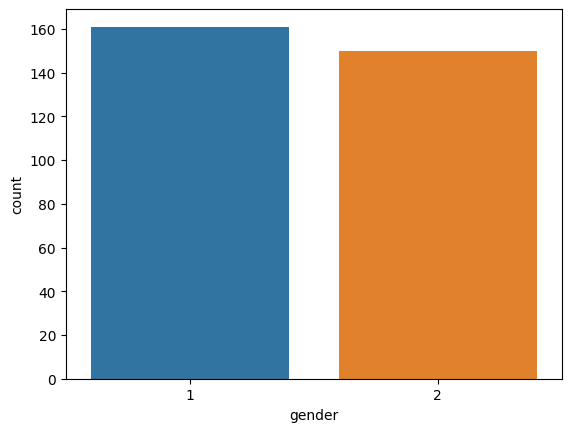

In [ ]:
sns.countplot(df, x = 'gender')

In [ ]:
diabetes[['condition','A1C_level']].values.tolist()

[[2.0, 9.6],
 [2.0, 7.0],
 [2.0, 8.7],
 [2.0, 11.1],
 [2.0, 5.1],
 [2.0, 11.2],
 [2.0, 7.7],
 [2.0, 7.8],
 [2.0, 9.7],
 [2.0, 6.1],
 [2.0, 5.8],
 [2.0, 5.9],
 [2.0, 6.6],
 [2.0, 8.4],
 [2.0, 7.2],
 [2.0, 6.0],
 [2.0, 5.4],
 [2.0, 11.2],
 [2.0, 7.3],
 [2.0, 6.9],
 [2.0, 10.5],
 [2.0, 5.9],
 [2.0, 6.5],
 [2.0, 6.5],
 [2.0, 12.2],
 [2.0, 9.6],
 [2.0, 7.6],
 [2.0, 7.2],
 [2.0, 7.4],
 [2.0, 7.9],
 [2.0, 6.2],
 [2.0, 6.0],
 [2.0, 6.0],
 [2.0, 6.4],
 [2.0, 8.8],
 [2.0, 5.9],
 [2.0, 6.8],
 [2.0, 6.0],
 [2.0, 11.0],
 [2.0, 8.0],
 [2.0, 10.9],
 [2.0, 7.3],
 [2.0, 6.7],
 [2.0, 8.0],
 [2.0, 6.3],
 [2.0, 6.7],
 [2.0, 11.9],
 [2.0, 9.8],
 [2.0, 6.2],
 [2.0, 8.1],
 [2.0, 6.8],
 [2.0, 11.5],
 [2.0, 10.2],
 [2.0, 10.6],
 [2.0, 10.5],
 [2.0, 6.2],
 [2.0, 6.4],
 [2.0, 8.1],
 [2.0, 8.9],
 [2.0, 6.7],
 [2.0, 7.2],
 [2.0, 8.4],
 [2.0, 6.5],
 [2.0, 8.6],
 [2.0, 7.3],
 [2.0, 6.5],
 [2.0, 7.4],
 [2.0, 6.3],
 [2.0, 6.2],
 [2.0, 6.3],
 [2.0, 7.8],
 [2.0, 5.9],
 [2.0, 7.5],
 [2.0, 6.7],
 [2.0, 9.4],
 [2.0, 6.4],
